# EN3160 Assignment 1

### Q1. 
![Question 01](q/q1.png)


(810, 720)


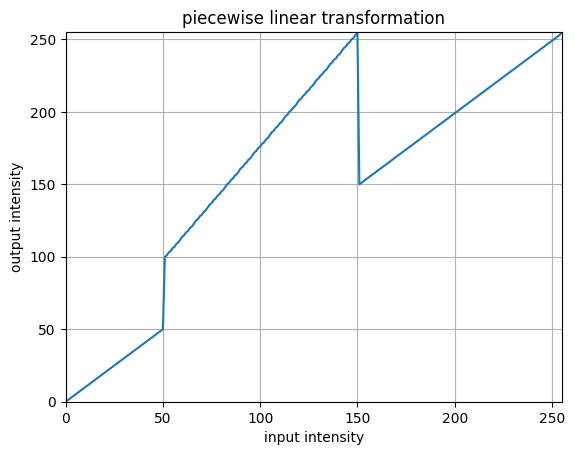

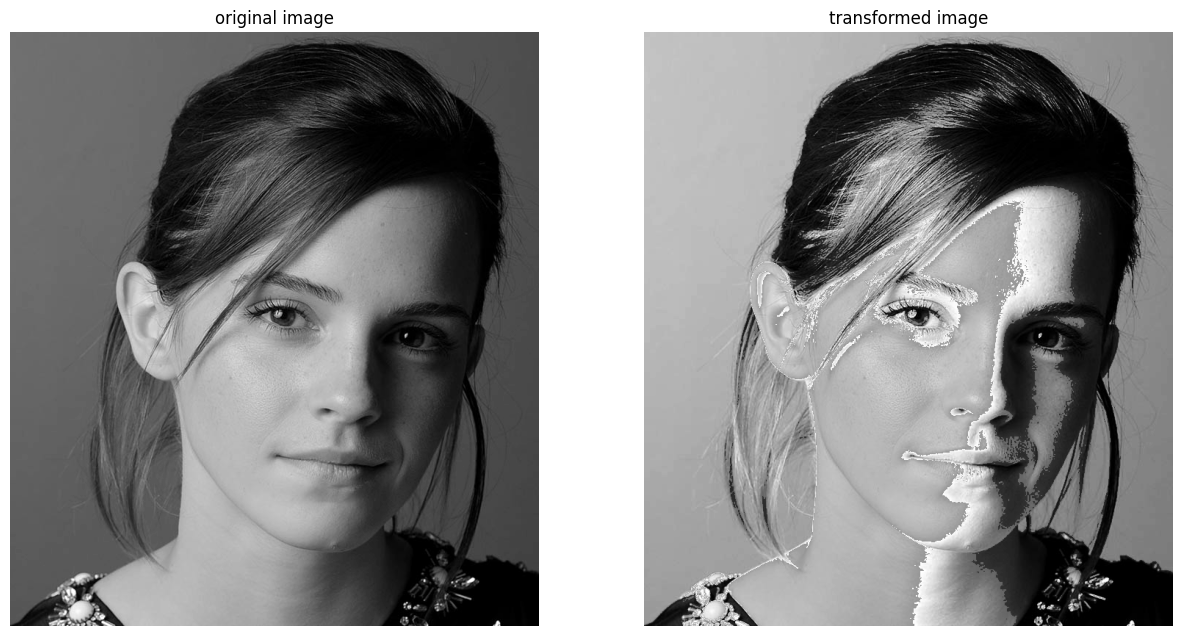

In [89]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read the image
img = cv.imread(r"a1images/a1images/emma.jpg" , cv.IMREAD_GRAYSCALE )

assert img is not None, "file could not be read, check with os.path.exists()"
print(img.shape)
#create peacewise  linear transformation
t1 = np.linspace(0 ,50 , 51 ,endpoint=True , dtype = np.uint8)
t2 = np.linspace(100 , 255 , 100 , endpoint=True , dtype = np.uint8)
t3 = np.linspace(150 , 255 , 105 , endpoint=True , dtype = np.uint8)

# implement the intensity transformation 
transformation = np.concatenate((t1 , t2 , t3))

#apply the transformation
img_transformed = cv.LUT(img , transformation)

#plot the transformation
plt.plot(transformation)
plt.axis([0 , 255 , 0 , 255])
plt.title("piecewise linear transformation")
plt.xlabel("input intensity")
plt.ylabel("output intensity")
plt.grid(True)
plt.show()

#plot the original and transformed images
fig , ax = plt.subplots(1 , 2 , figsize=(15,10))
ax[0].imshow(img , cmap="gray")
ax[0].set_title("original image")
ax[0].axis("off")
ax[1].imshow(img_transformed , cmap="gray")
ax[1].set_title("transformed image")
ax[1].axis("off")
plt.show()



### Q2.
![Question 01](q/q2.png)


#### a. white matter

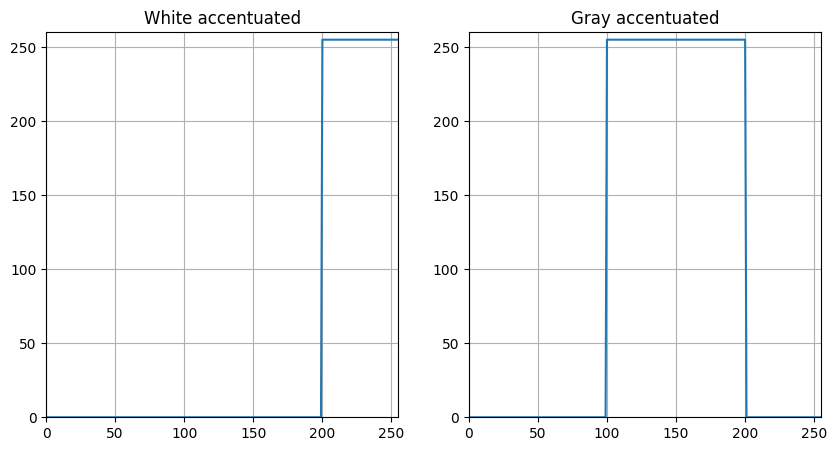

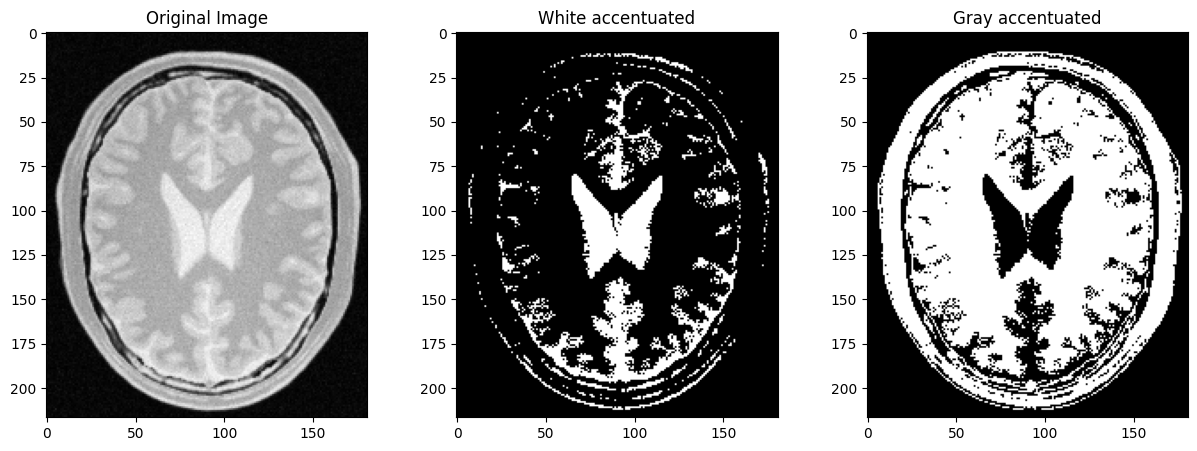

In [90]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Defining the transformation function for white
def white():
    result = np.zeros(256, dtype=np.uint8)  # Create an array of zeros with size 256
    for i in range(256):
        if i < 200 :
            result[i] = 0
        else:
            result[i] = 255
    return result

def gray():
    result = np.zeros(256, dtype=np.uint8)  # Create an array of zeros with size 256
    for i in range(256):
        if i < 100 or i > 200:
            result[i] = 0  # Set values below 100 and above 200 to 0
        else:
            result[i] = 255  # Set values from 100 to 200 to 150
    return result

# Call the transformation functions
white_accentuated = white()
gray_accentuated = gray()

#plot the transformation functions
fig , ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(white_accentuated)
ax[0].set_title("White accentuated")
ax[0].axis([0 ,255 ,0 ,260])
ax[0].grid()
ax[1].plot(gray_accentuated)
ax[1].set_title("Gray accentuated")
ax[1].axis([0 ,255 ,0 ,260])
ax[1].grid()
plt.show()

# Read the image
img = cv.imread(r"a1images/a1images/brain_proton_density_slice.png" , cv.IMREAD_GRAYSCALE )

assert img is not None, "file could not be read, check with os.path.exists()"

# Apply the transformation functions
white_img = cv.LUT(img, white_accentuated)
gray_img = cv.LUT(img, gray_accentuated)
# Display the images
fig , ax  = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(white_img, cmap='gray')
ax[1].set_title("White accentuated")
ax[2].imshow(gray_img, cmap='gray')
ax[2].set_title("Gray accentuated")
plt.show()





### Q3.
![Question 01](q/q3.png)

#### a. Apply the gamma correction



The **L\*a\*b\*** color space, also known as the **CIELAB** color space, represents color in a way that separates the **lightness** from the **color components**. It is widely used in image processing and computer vision for color adjustments and corrections.

### L\*, a\*, b\* Components

### 1. L\* (Lightness)
- **L\*** represents the lightness of the color, ranging from **0 (black)** to **100 (white)**.
- It defines how **dark** or **light** a color is, independent of the hue and saturation.
- Higher values of **L\*** represent lighter colors, while lower values represent darker colors.

### 2. a\* (Green-Red)
- **a\*** represents the color axis between **green** and **red**.
- **Negative** values of **a\*** indicate a greenish color, while **positive** values indicate a reddish color.
- **a\*** helps to distinguish colors based on their green-to-red balance.

### 3. b\* (Blue-Yellow)
- **b\*** represents the color axis between **blue** and **yellow**.
- **Negative** values of **b\*** indicate a blueish color, while **positive** values indicate a yellowish color.
- **b\*** helps to distinguish colors based on their blue-to-yellow balance.

---



When applying **gamma correction** to the **L\*** plane (Lightness), it adjusts the **brightness** or **contrast** of the image without altering the **color information** from the **a\*** and **b\*** planes.

- **Gamma correction** is used to correct the non-linearity in the way light is captured or displayed. It is often applied to the **L\*** channel to make an image appear more natural to human vision.
- Gamma correction enhances the brightness or contrast while maintaining the original colors of the image.

### The mathematical equation for gamma correction is:



$$
I_{\text{output}} = 255 \times \left( \frac{I_{\text{input}}}{255} \right)^{\gamma}
$$

Where:
- $I_{\text{input}}$ is the input pixel intensity (ranging from 0 to 255).
- $I_{\text{output}}$ is the gamma-corrected output pixel intensity (ranging from 0 to 255).
- $\gamma$ is the gamma correction factor (a scalar value).


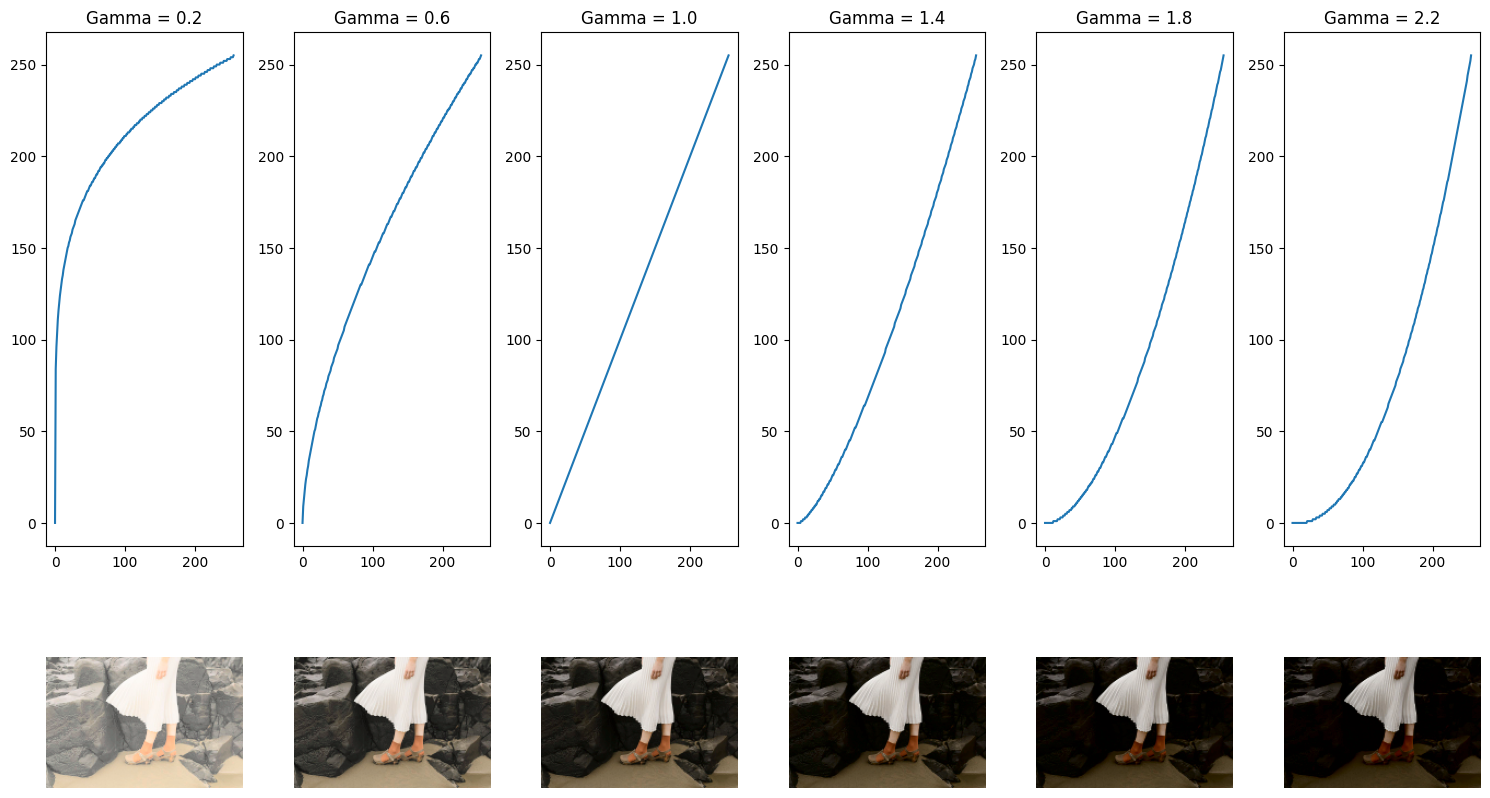

In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to RGB
img = cv.imread(r"a1images/a1images/highlights_and_shadows.jpg" , cv.COLOR_BGR2Lab)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert image to Lab color space
img_converted = cv.cvtColor(img, cv.COLOR_RGB2Lab)

# Split the Lab image into L*, a*, and b* channels
L, a, b = cv.split(img_converted)

# Define gamma values
gamma_values = np.array([0.2, 0.6, 1, 1.4, 1.8, 2.2])

# Prepare subplots
fig, ax = plt.subplots(2, 6, figsize=(15, 10))

for i, gamma in enumerate(gamma_values):
    # Create gamma correction lookup table
    t = np.array([(p / 255) ** gamma * 255 for p in range(256)]).astype(np.uint8)
    L_gamma = cv.LUT(L, t)
    img_gamma_lab = cv.merge([L_gamma, a, b])   
    img_gamma_rgb = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2RGB)

    # Plot the gamma curve
    ax[0, i].plot(t)
    ax[0, i].set_title(f"Gamma = {gamma}")

    # Display the gamma-corrected image
    ax[1, i].imshow(img_gamma_rgb)
    ax[1, i].axis('off')

# Show the plots
plt.tight_layout()
plt.show()



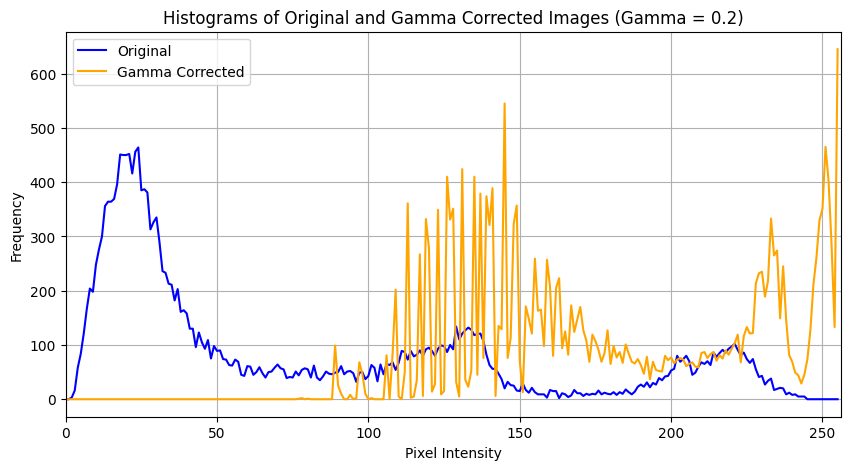

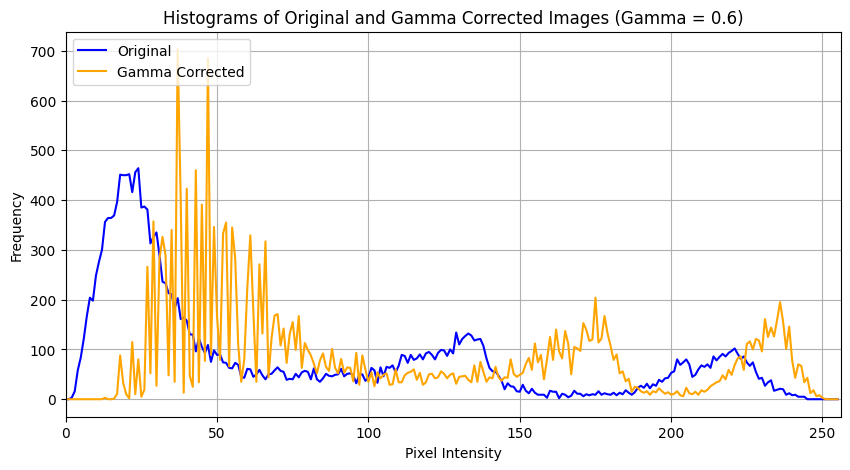

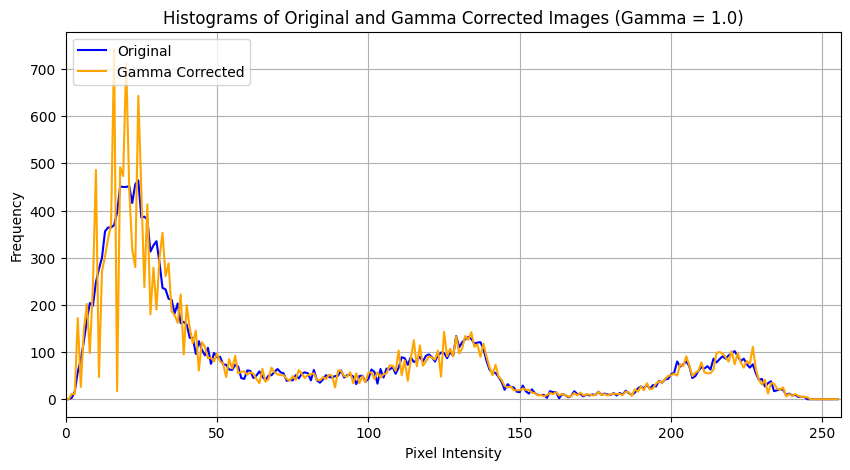

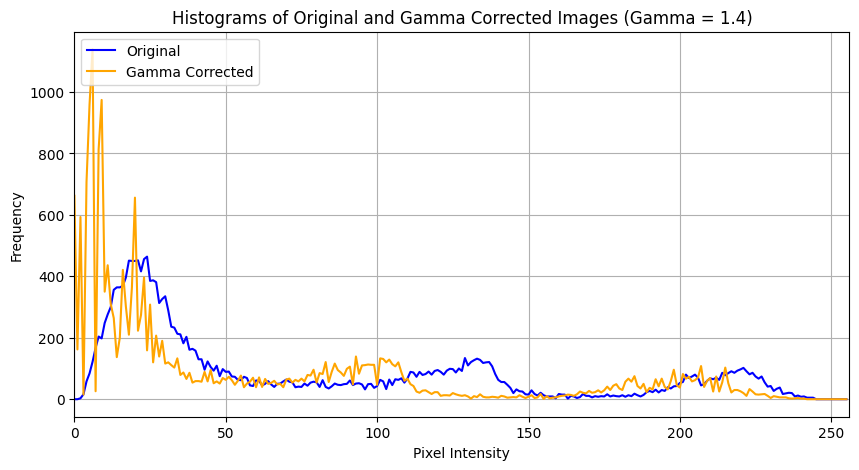

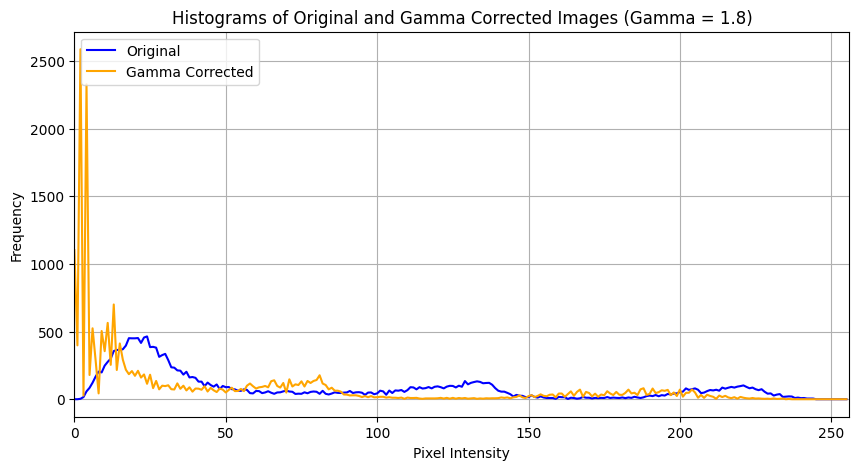

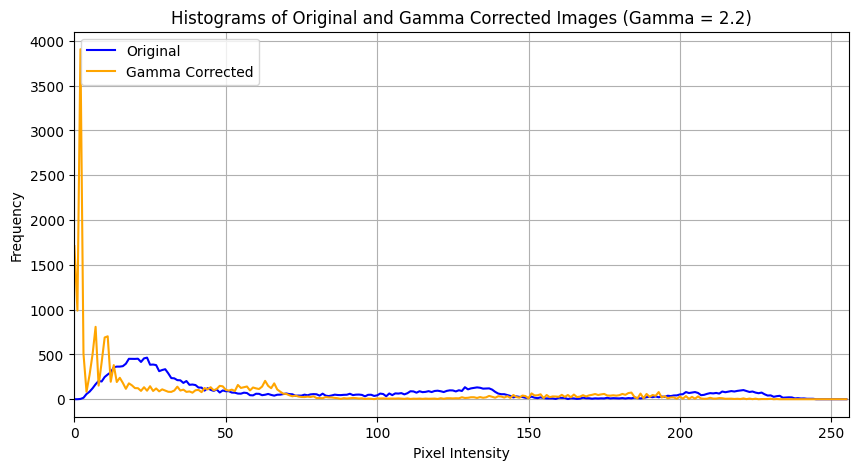

In [100]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to RGB
img = cv.imread(r"a1images/a1images/highlights_and_shadows.jpg" , cv.COLOR_BGR2Lab)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert image to Lab color space
img_converted = cv.cvtColor(img, cv.COLOR_RGB2Lab)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# Split the Lab image into L*, a*, and b* channels
L, a, b = cv.split(img_converted)

# Define gamma values
gamma_values = np.array([0.2, 0.6, 1, 1.4, 1.8, 2.2])


for i, gamma in enumerate(gamma_values):
    # Create gamma correction lookup table
    t = np.array([(p / 255) ** gamma * 255 for p in range(256)]).astype(np.uint8)
    L_gamma = cv.LUT(L, t)
    img_gamma_lab = cv.merge([L_gamma, a, b])   
    img_gamma_rgb = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2RGB)
    hist_gamma = cv.calcHist([img_gamma_rgb], [0], None, [256], [0, 256])


    
    # Plot histograms
    plt.figure(figsize=(10, 5))
    plt.plot(hist, label='Original', color='blue')
    plt.plot(hist_gamma, label='Gamma Corrected', color='orange')
    plt.xlim([0, 256])
    plt.title('Histograms of Original and Gamma Corrected Images' + f' (Gamma = {gamma})')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.grid(True)
    


# Show the plots
plt.show()

## Gamma Correction and Its Effects on Image Brightness



$$
I_{\text{output}} = 255 \times \left( \frac{I_{\text{input}}}{255} \right)^{\gamma}
$$


#### Effects of Different Gamma Values:

1. **Gamma Values Less Than 1 ($\gamma < 1$)**:
   - When the gamma value is less than 1, the output intensity increases for lower input intensities. This results in a brighter image because more pixel values are mapped to higher intensity values.
   - As a result, the histogram of the image will be distributed towards the higher pixel values, indicating that more pixels are present in the brighter areas of the image.

2. **Gamma Values Greater Than 1 ($\gamma > 1$)**:
   - When the gamma value is greater than 1, the output intensity decreases for lower input intensities. This leads to a darker image since the lower pixel values are compressed more towards the lower end of the intensity scale.
   - Consequently, the histogram will show a concentration of pixel values towards the lower pixel values, reflecting that more pixels are present in the darker regions of the image.


